# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

In [1]:
import warnings
warnings.filterwarnings('ignore')

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

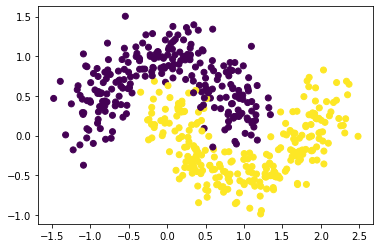

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

def plot_decisions(dataset, dataset_labels, classifiers, titles, x_lables, nrows=1, ncols=1):
  fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5*nrows))

  for clf, ax, title, x_label in zip(classifiers, axes.flat, titles, x_labels):
    plot_decision_regions(X=dataset, y=dataset_labels, clf=clf, ax=ax)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(x_label, fontsize='x-large')

  plt.show()

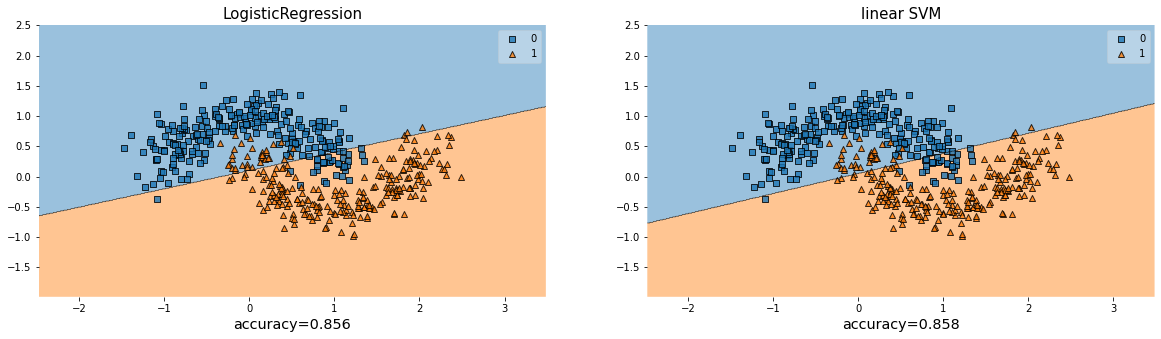

In [5]:
lr = LogisticRegression()
svm = SVC(kernel='linear')

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

titles = ['LogisticRegression', 'linear SVM']
x_labels = ['accuracy={}'.format(accuracy_score(moons_labels, lr.predict(moons_points))),
            'accuracy={}'.format(accuracy_score(moons_labels, svm.predict(moons_points)))]
classifiers = [lr, svm]
plot_decisions(moons_points, moons_labels, classifiers, titles, x_labels, nrows=1, ncols=2)

In [6]:
from sklearn.metrics import classification_report
print(classification_report(moons_labels, lr.predict(moons_points)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       250
           1       0.86      0.85      0.86       250

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [7]:
print(classification_report(moons_labels, svm.predict(moons_points)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       250
           1       0.87      0.85      0.86       250

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



***These models do not really work well on data which cannot be seperated linearly. Changing params doesn't help***

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

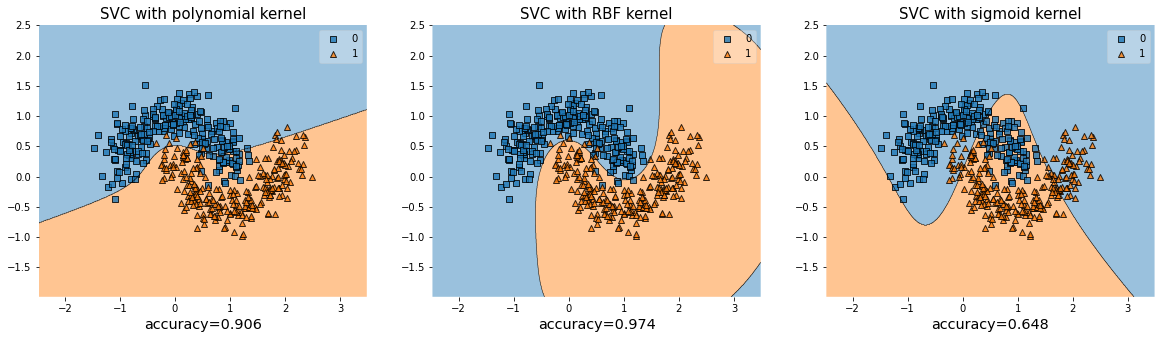

In [8]:
poly = SVC(kernel='poly')
rbf = SVC(kernel='rbf')
sigmoid = SVC(kernel='sigmoid')

poly.fit(moons_points, moons_labels)
rbf.fit(moons_points, moons_labels)
sigmoid.fit(moons_points, moons_labels)

titles = ['SVC with polynomial kernel', 'SVC with RBF kernel', 'SVC with sigmoid kernel']
x_labels = ['accuracy={}'.format(accuracy_score(moons_labels, poly.predict(moons_points))), 
            'accuracy={}'.format(accuracy_score(moons_labels, rbf.predict(moons_points))),
            'accuracy={}'.format(accuracy_score(moons_labels, sigmoid.predict(moons_points)))]
classifiers = [poly, rbf, sigmoid]
plot_decisions(moons_points, moons_labels, classifiers, titles, x_labels, nrows=1, ncols=3)

In [9]:
from sklearn.model_selection import GridSearchCV

# find best params for svm with polynomial kernel
params = {
     'C': [0.01, 0.1, 0, 1, 10, 100],
     'degree': range(1, 10, 1),
     'gamma': ['scale', 'auto', 0.1, 0.5, 0.9],
     'coef0': np.arange(-1, 2, 0.1)
}

grid = GridSearchCV(poly, params)
grid.fit(moons_points, moons_labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0, 1, 10, 100],
                         'coef0': arr...
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00]),
                         'degree': range(1, 10),
                         'gamma': ['scale', 'auto', 0.1, 0.5, 0.9]},
             pre_dispatch='2*n_job

In [10]:
grid.best_params_

{'C': 0.1, 'coef0': 1.4999999999999996, 'degree': 9, 'gamma': 'scale'}

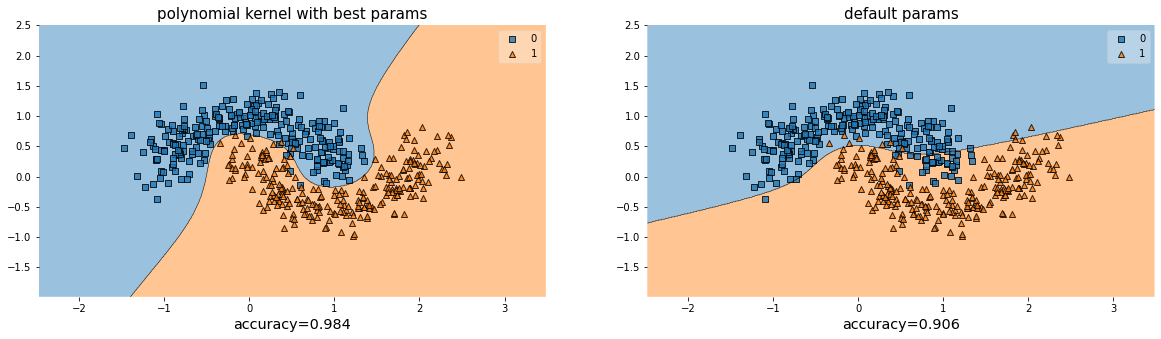

In [11]:
poly_best_params = SVC(kernel='poly', C=0.1, coef0=1.5, degree=9)
poly_best_params.fit(moons_points, moons_labels)

titles = ['polynomial kernel with best params','default params']
x_labels = ['accuracy={}'.format(accuracy_score(moons_labels, poly_best_params.predict(moons_points))),
            'accuracy={}'.format(accuracy_score(moons_labels, poly.predict(moons_points)))]
classifiers = [poly_best_params, poly]
plot_decisions(moons_points, moons_labels, classifiers, titles, x_labels, nrows=1, ncols=2)

***Accuracy has increased, let's try the same for other kernels***

In [12]:
# find best params for svm with sigmoid kernel
params = {
     'C': [0.001, 0.01, 0.1, 0, 1, 10, 100, 1000],
     'gamma': ['scale', 'auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
     'coef0': np.arange(-1, 2, 0.1)
}

grid = GridSearchCV(sigmoid, params)
grid.fit(moons_points, moons_labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='sigmoid', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 1, 10, 100, 100...
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00]),
                         'gamma': ['scale', 'auto', 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit

In [13]:
grid.best_params_

{'C': 1000, 'coef0': -1.0, 'gamma': 0.1}

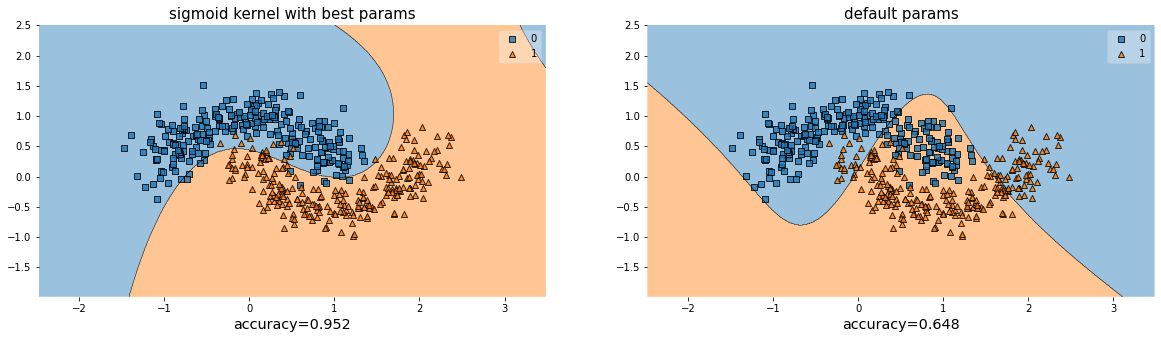

In [14]:
sigmoid_best_params = SVC(kernel='sigmoid', C=1000, coef0=-1, gamma=0.1)
sigmoid_best_params.fit(moons_points, moons_labels)

titles = ['sigmoid kernel with best params','default params']
x_labels = ['accuracy={}'.format(accuracy_score(moons_labels, sigmoid_best_params.predict(moons_points))),
            'accuracy={}'.format(accuracy_score(moons_labels, sigmoid.predict(moons_points)))]
classifiers = [sigmoid_best_params, sigmoid]
plot_decisions(moons_points, moons_labels, classifiers, titles, x_labels, nrows=1, ncols=2)

In [15]:
# find best params for svm with rbf kernel
params = {
     'C': range(50, 150, 10),
     'gamma': np.arange(0.8, 1, 0.01)
}

grid = GridSearchCV(rbf, params)
grid.fit(moons_points, moons_labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': range(50, 150, 10),
                         'gamma': array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
grid.best_params_

{'C': 100, 'gamma': 0.9000000000000001}

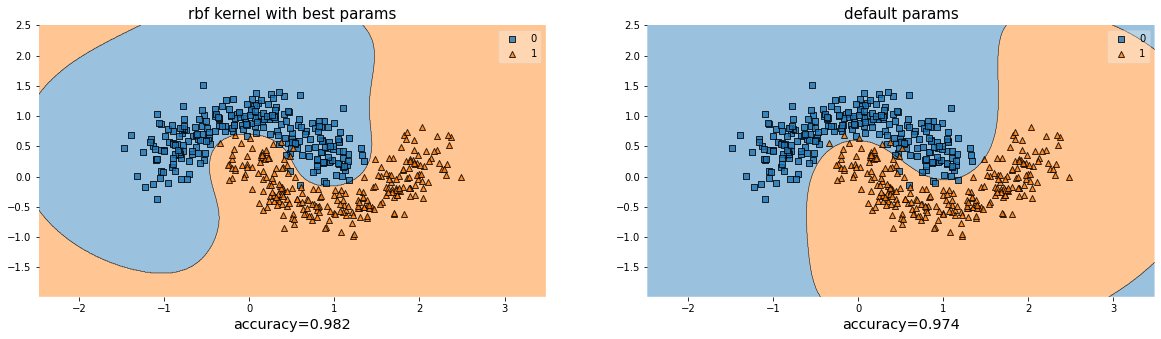

In [17]:
rbf_best_params = SVC(kernel='rbf', C=100, gamma=0.9)
rbf_best_params.fit(moons_points, moons_labels)

titles = ['rbf kernel with best params','default params']
x_labels = ['accuracy={}'.format(accuracy_score(moons_labels, rbf_best_params.predict(moons_points))),
            'accuracy={}'.format(accuracy_score(moons_labels, rbf.predict(moons_points)))]
classifiers = [rbf_best_params, rbf]
plot_decisions(moons_points, moons_labels, classifiers, titles, x_labels, nrows=1, ncols=2)

***Conclusion: rbf and polynomial kernels optimization classified the points well even without best params. However, after changing params accuracy improved even more. Sigmoid kernel didn't show off well at first, but after params optimization it can also detect points well.
Compared to the first task of this lab, the borders are no longer linear. After changing params, the borders for sigmoid and poly resemble the shapes of points, and rbf circles another class***

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

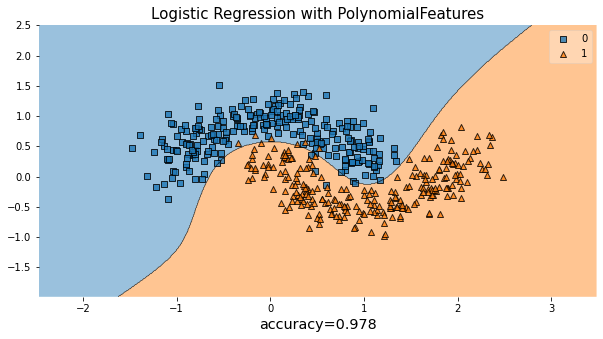

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([('pf', PolynomialFeatures(7)), ('lr',lr)])
pipe.fit(moons_points, moons_labels)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_decision_regions(X=moons_points, y=moons_labels, clf=pipe, ax=ax)
ax.set_title('Logistic Regression with PolynomialFeatures', fontsize=15)
ax.set_xlabel('accuracy={}'.format(accuracy_score(moons_labels, pipe.predict(moons_points))), fontsize='x-large')
plt.show()

**This solution works as well as SVM from task 2, the border is similar to that of polynomial kernel. And the degree is close to the one I chose for polynomial kernel**

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

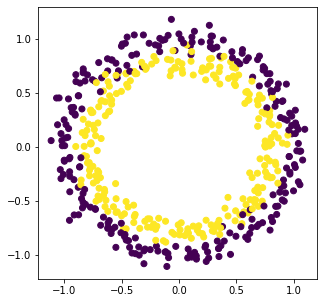

In [21]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

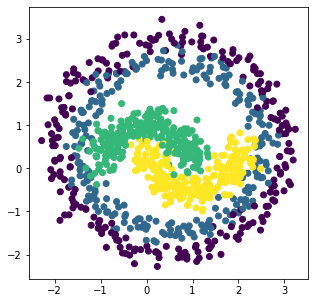

In [22]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [23]:
lr = LogisticRegression(max_iter=1000)
pipe = Pipeline([('pf', PolynomialFeatures()), ('lr',lr)])
params = {
     'pf__degree': range(1, 15, 1)
}

grid = GridSearchCV(pipe, params)
grid.fit(points, labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pf',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1000,


In [24]:
grid.best_params_

{'pf__degree': 4}

In [25]:
params = {
     'C': [0.001, 0.01, 0.1, 0, 1, 10, 100, 1000],
     'gamma': ['scale', 'auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
     'coef0': np.arange(-1, 2, 0.1)
}

grid = GridSearchCV(sigmoid, params)
grid.fit(points, labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='sigmoid', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 1, 10, 100, 100...
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00]),
                         'gamma': ['scale', 'auto', 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit

In [26]:
grid.best_params_

{'C': 1000, 'coef0': -1.0, 'gamma': 0.1}

In [27]:
pipe = Pipeline([('pf', PolynomialFeatures(degree=4)), ('lr',lr)])
pipe.fit(points, labels)

poly = SVC(kernel='poly', degree=4, C=100, gamma=0.9, coef0=1.2)
rbf = SVC(kernel='rbf')
sigmoid = SVC(kernel='sigmoid', C=1000, coef0=-1, gamma=0.1)

poly.fit(points, labels)
rbf.fit(points, labels)
sigmoid.fit(points, labels)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=-1,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(points, labels)

grad_boosting = GradientBoostingClassifier()
grad_boosting.fit(points, labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

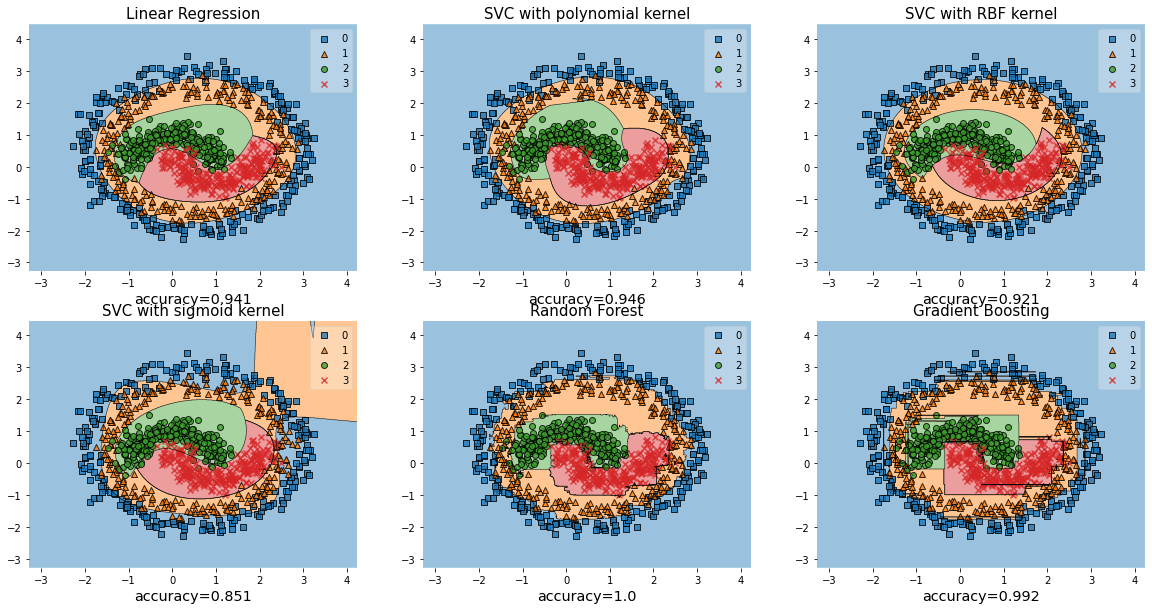

In [29]:
titles = ['Linear Regression','SVC with polynomial kernel', 'SVC with RBF kernel', 'SVC with sigmoid kernel', 'Random Forest', 'Gradient Boosting']
x_labels = ['accuracy={}'.format(accuracy_score(labels, pipe.predict(points))),
            'accuracy={}'.format(accuracy_score(labels, poly.predict(points))), 
            'accuracy={}'.format(accuracy_score(labels, rbf.predict(points))),
            'accuracy={}'.format(accuracy_score(labels, sigmoid.predict(points))),
            'accuracy={}'.format(accuracy_score(labels, rand_forest.predict(points))),
            'accuracy={}'.format(accuracy_score(labels, grad_boosting.predict(points)))]
classifiers = [pipe, poly, rbf, sigmoid, rand_forest, grad_boosting]
plot_decisions(points, labels, classifiers, titles, x_labels, nrows=2, ncols=3)

**Linear regression and SVM with different kernels showed quite a good result. The lowest accuracy belong to sigmoid kernel.
Random forest can classify points with 100% accuracy (the only one from the observed methods)**